In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as kn
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ds = pd.read_csv("/content/drive/MyDrive/datasets/Project 2/Iris.csv")

In [4]:
ds.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [5]:
ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
ds.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
ds["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [9]:
ds = ds.drop(columns = ['Id'])

In [10]:
ds.head(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


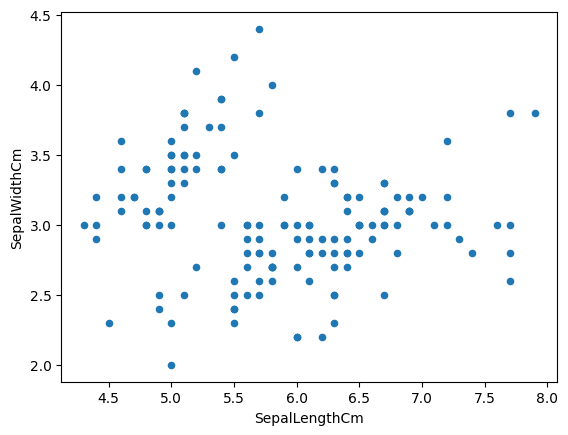

In [11]:
ds.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

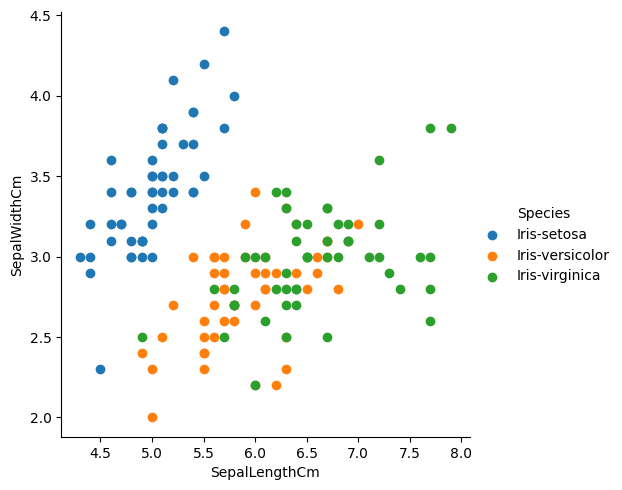

In [12]:
sns.FacetGrid(ds, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
plt.show()

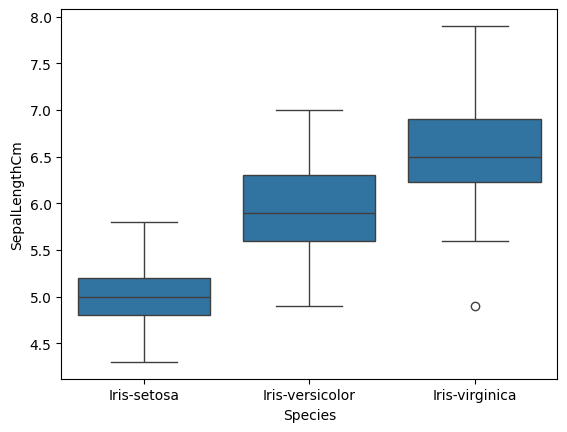

In [13]:
sns.boxplot(x="Species", y="SepalLengthCm", data=ds)
plt.show()

In [14]:
ds.query('SepalWidthCm > 3.5 & SepalLengthCm > 7')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica


In [15]:
ds.query('SepalWidthCm < 2.5 & SepalLengthCm == 4.5')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
41,4.5,2.3,1.3,0.3,Iris-setosa


In [16]:
ds.query('SepalWidthCm == 2.5 & SepalLengthCm < 5')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,4.9,2.5,4.5,1.7,Iris-virginica


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


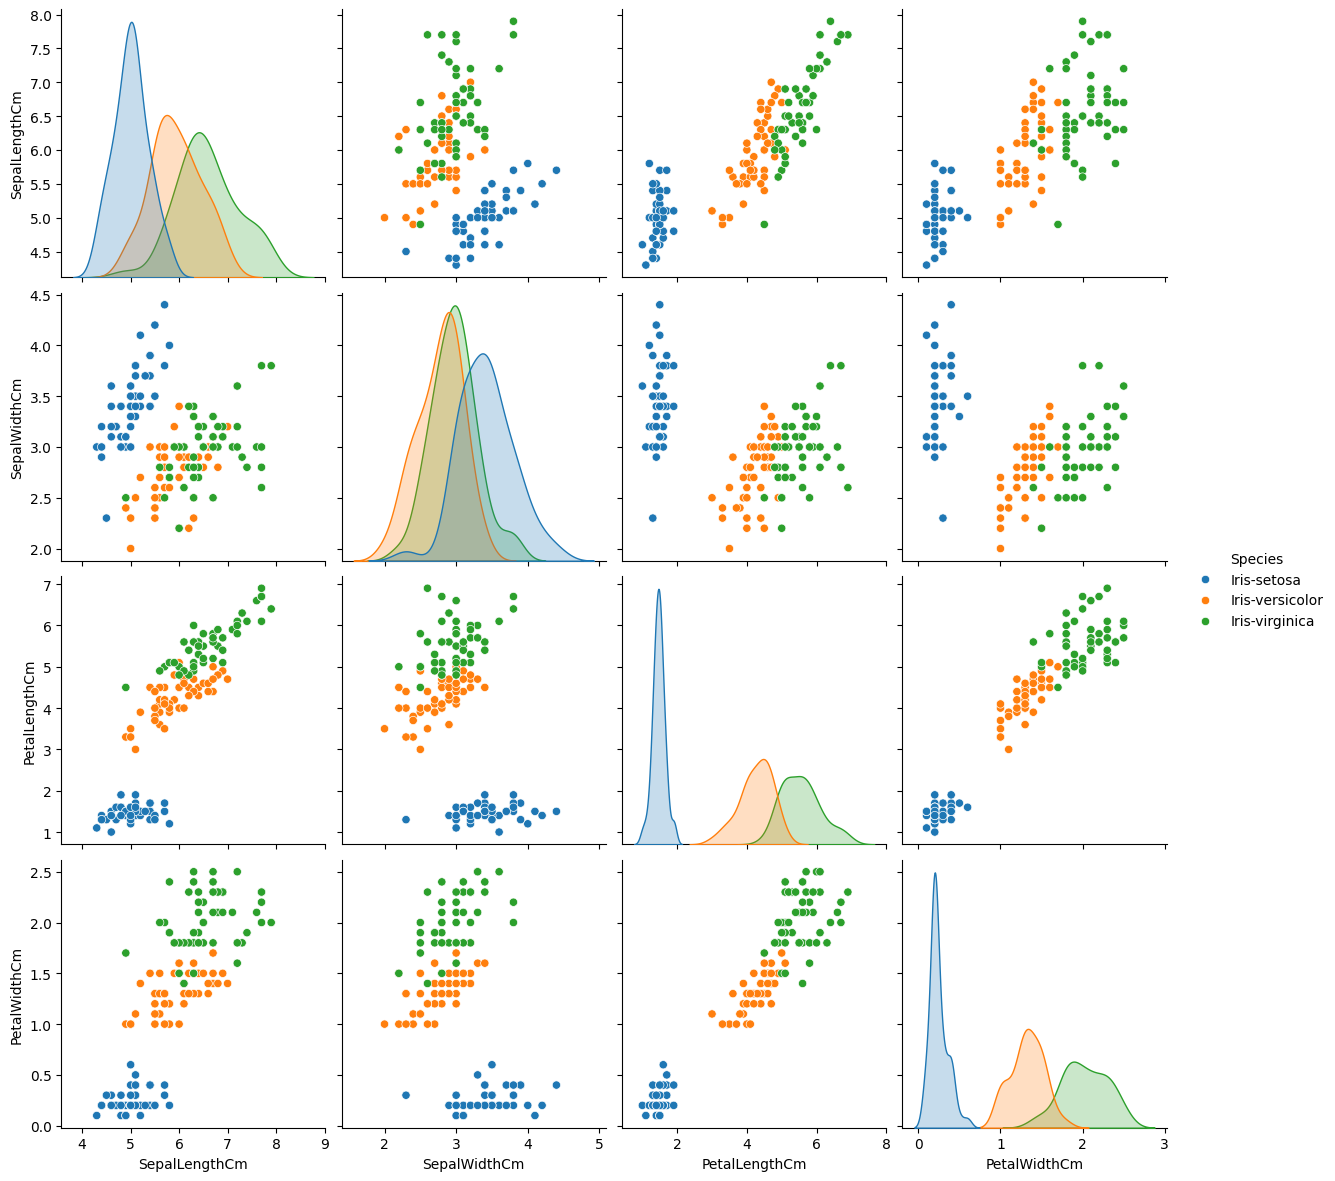

In [17]:
sns.pairplot(ds, hue="Species", size=3)
plt.show()

In [18]:
!pip install plotly

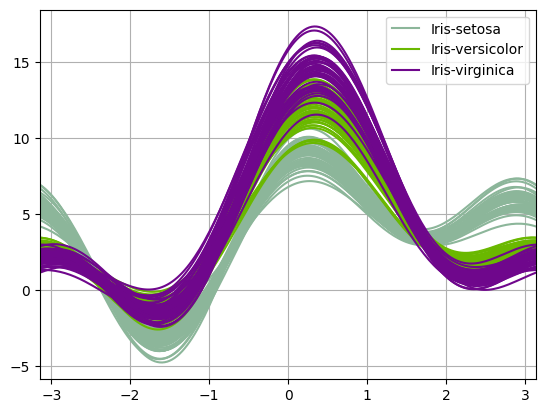

In [19]:
from pandas.plotting import andrews_curves as andrew
andrew(ds, "Species")
plt.show()

In [20]:
ds = ds.drop(index=[131, 117, 106, 41])

In [28]:
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [29]:
y = ds['Species']
x = ds.drop(columns='Species')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [30]:
y.head(7)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
6,Iris-setosa


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
for i in range(3,15,3):
  neigh = kn(n_neighbors=i)
  neigh.fit(x_train, y_train)
  pred = neigh.predict(x_test)
  accuracy = accuracy_score(pred, y_test)
  print("kneighbors {}".format(i))
  print(accuracy)
  print(classification_report(pred, y_test, labels=None, digits=4))
  print("")

kneighbors 3
0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        16
Iris-versicolor     0.9444    1.0000    0.9714        17
 Iris-virginica     1.0000    0.9167    0.9565        12

       accuracy                         0.9778        45
      macro avg     0.9815    0.9722    0.9760        45
   weighted avg     0.9790    0.9778    0.9776        45


kneighbors 6
0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        16
Iris-versicolor     0.9444    1.0000    0.9714        17
 Iris-virginica     1.0000    0.9167    0.9565        12

       accuracy                         0.9778        45
      macro avg     0.9815    0.9722    0.9760        45
   weighted avg     0.9790    0.9778    0.9776        45


kneighbors 9
0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    

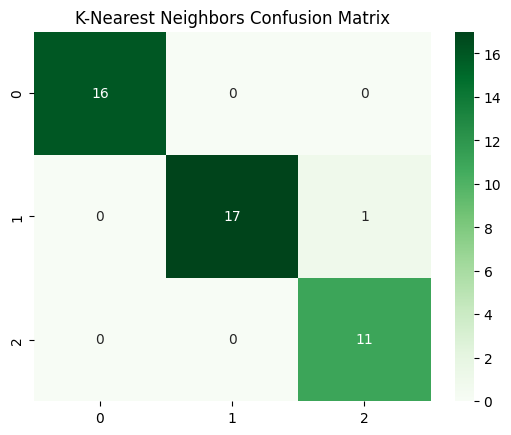

In [33]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Greens')
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

In [34]:
model = RF(n_estimators=70, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=0)

In [35]:
pred=model.predict(x_test)
cm=confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test,pred)
print(model)
print(accuracy)
print(classification_report(y_test,pred, labels=None, digits=4))

RandomForestClassifier(n_estimators=70, random_state=0)
0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        16
Iris-versicolor     1.0000    0.9444    0.9714        18
 Iris-virginica     0.9167    1.0000    0.9565        11

       accuracy                         0.9778        45
      macro avg     0.9722    0.9815    0.9760        45
   weighted avg     0.9796    0.9778    0.9779        45



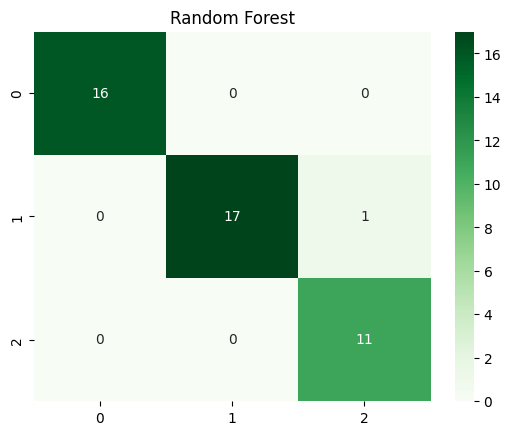

In [36]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest")
plt.show()

In [40]:
misclassified_indices = np.where(pred != y_test)[0]

for idx in misclassified_indices:
    print(f"Sample Index: {idx}")
    print("Features:", x_test.iloc[idx] if hasattr(x_test, 'iloc') else x_test[idx])
    print("True Label:", y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx])
    print("Predicted Label:", pred[idx])
    print("-" * 40)

Sample Index: 37
Features: [ 0.1222285  -0.784871    0.70793846  0.48004983]
True Label: Iris-versicolor
Predicted Label: Iris-virginica
----------------------------------------


In [41]:
print(ds.iloc[37])

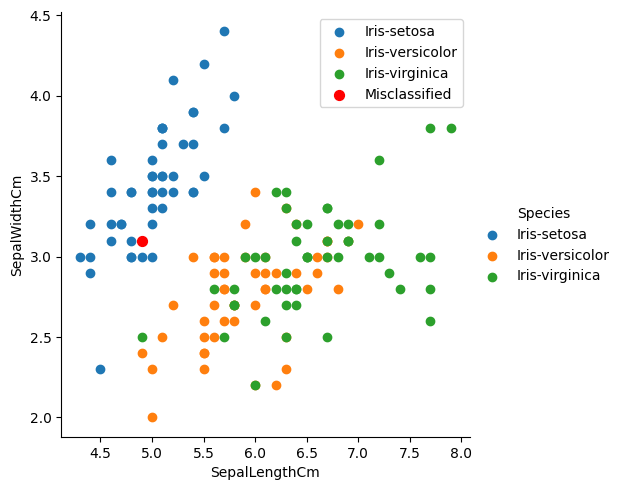

In [47]:
g = sns.FacetGrid(ds, hue="Species", height=5)
g.map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

highlight_index = 37
plt.scatter(ds.loc[highlight_index, "SepalLengthCm"],
            ds.loc[highlight_index, "SepalWidthCm"],
            color='red',
            s=50,
            label="Misclassified")

plt.legend()
plt.show()